# Ensamble de matrices

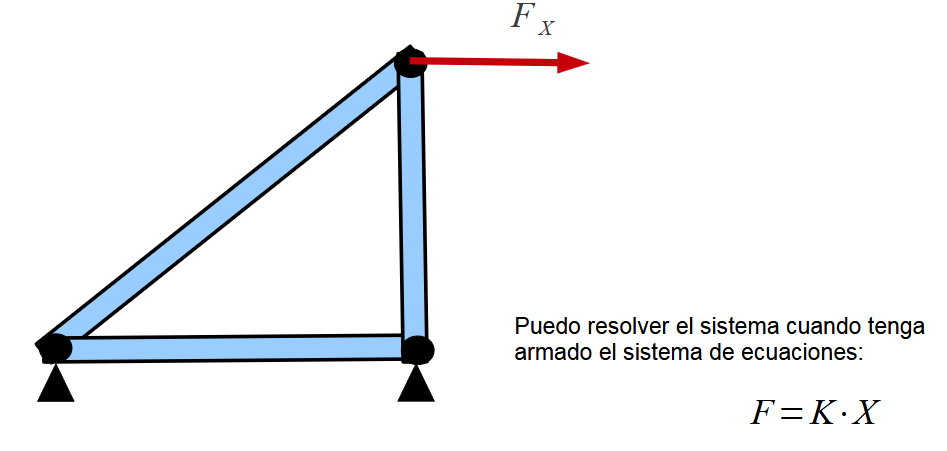

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
# Definicion de la matriz de nodos
# Cada fila de la matriz representa cada nodo del sistema, en las columnas se ponen las coordenadas de cada nodo.

L = 1       # [m]
a = 1e-4    # [m2]
E = 300e9   # [PA]

#   Para este caso el sistema esta definido por 3 nodos:
#............... MATRIZ DE NODOS .............................................

MN = np.array([[0, 0],
               [L, 0],
               [L, L]])

#   Se define la variable Grados de Libertar por Nodo (glxn)

glxn = 2    # Se tienen dos grados de libertad por cada nodo en el sistema

#.............................................................................

#.............. MATRIZ DE CONECTIVIDAD .......................................

#   Se tiene una fila por caa elemento que conforma el sistema y para cada elemento se completara con la lista de nodos
#   que lo conforma.

MC = np.array([[0, 1],
               [1, 2],
               [2, 0]])

#.............. MATRIZ DE SECCIONES ...........................................

# Se tiene un valor por cada elemento del sistema

A = np.ones(MC.shape[0])*a

In [3]:
print(A)

[0.0001 0.0001 0.0001]


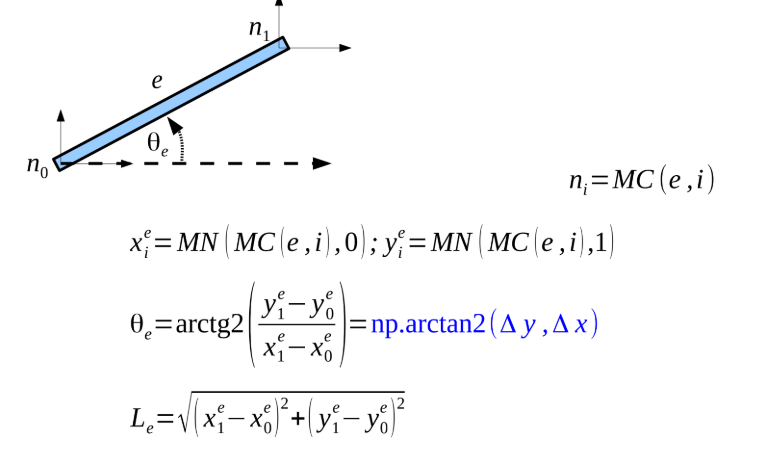

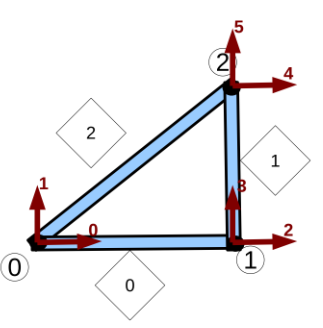

In [4]:
def MatrizDeRigidez(MC, MN, E, A, glxn):

	n,m = MC.shape		# n es la cantidad de elementos que va a tener mi sistema
	r,l = MN.shape

	kglobal = np.zeros((glxn*r,glxn*r))
	K = np.zeros((glxn*r,glxn*r))

	for e in range(n):  # Recorro los elementos del sistema

		#	Calculo el angulo tita y la longitud para cada elemento

		tita_e = np.arctan2( MN[ MC[e,1] , 1 ] - MN[ MC[e,0] , 1 ] , MN[ MC[e,1] , 0 ] - MN[ MC[e,0] , 0 ])

		L_e = np.sqrt( (MN[ MC[e,1] , 0 ] - MN[ MC[e,0] , 0])**2 + (MN[ MC[e,1] , 1 ] - MN[ MC[e,0] , 1 ])**2 )

		#	Calculo la constate k que acompaña a cada matriz para cada elemento 
		
		k_e = ( E * A[e] ) / L_e        #   (Se modifica para que tome el area de cada elemento)

		#	Se calcula la matriz de rotacion de cada elemento

		c = np.cos(tita_e)
		s = np.sin(tita_e)

		K_rot = k_e * np.array([[ c*c , c*s , -c*c , -c*s ],
						  		[ c*s , s*s , -c*s , -s*s ],
								[ -c*c , -c*s , c*c , c*s ],
								[ -c*s , -s*s , c*s , s*s ]])

		#......................................................................................

		#................. PRIMER METODO ......................................................

		for i in range(glxn):

			ni = MC[e,i]

			rangoi = np.arange(i * glxn,( i + 1 ) * glxn)
			
			rangoni = np.arange(ni * glxn,( ni + 1 ) * glxn)

			for j in range(glxn):

				nj = MC[e,j]

				rangoj =  np.arange(j * glxn, (j + 1) * glxn)
				rangonj = np.arange(nj*glxn,(nj + 1) * glxn)

				kglobal[np.ix_(rangoni,rangonj)] += K_rot[np.ix_(rangoi, rangoj)]

		#................ SEGUNDO METODO .......................................................
		 	
		Ni = MC[e,0]
		Nj = MC[e,1]

		indices = np.array([ Ni * glxn , (Ni + 1) * glxn -1 , Nj * glxn , (Nj + 1) * glxn - 1])
		
		#	Esta funcion es para crear una malla de indices.

		K[np.ix_(indices,indices)] += K_rot

		#.........................................................................................
		
	return K,kglobal

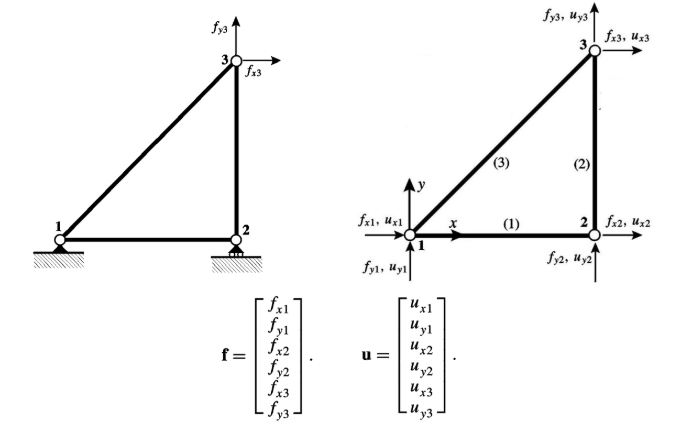

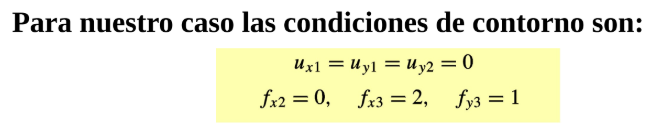

In [5]:
#   Para el problema defino la matriz de condiciones de contorno. 

#   La primera columna me indica el tipo de dato que conozco
#       Si es 0 se conoce la fuerza
#       Si es 1 se conoce el desplazamiento

b = np.array([[ 1 , 0 ],        # Para el nodo 0 en x
              [ 1 , 0 ],        # Para el nodo 0 en y
              [ 0 , 0 ],        # Para el nodo 1 en x
              [ 1 , 0 ],        # Para el nodo 1 en y
              [ 0 , 2 ],        # Para el nodo 2 en x
              [ 0 , 1 ]])       # Para el nodo 2 en y

In [6]:
ejemplo = np.array([
    [ 20,  10, -10,   0, -10, -10],
    [ 10,  10,   0,   0, -10, -10],
    [-10,   0,  10,   0,   0,   0],
    [  0,   0,   0,   5,   0,  -5],
    [-10, -10,  0,   0,  10,  10],
    [-10, -10,  0,  -5,  10,  15]])     # Esta es la matriz de prueba del apunte.]

In [7]:
np.set_printoptions(suppress=True, precision=4)        # Para eliminar los exponenciales


matrizA,matrizB = MatrizDeRigidez(MC, MN, E, A, glxn)


print(np.round(matrizA, 4) / (E * np.mean(A)))
print(np.round(matrizB, 4) / (E * np.mean(A)))


[[ 1.3536  0.3536 -1.      0.     -0.3536 -0.3536]
 [ 0.3536  0.3536  0.      0.     -0.3536 -0.3536]
 [-1.      0.      1.      0.     -0.     -0.    ]
 [ 0.      0.      0.      1.     -0.     -1.    ]
 [-0.3536 -0.3536 -0.     -0.      0.3536  0.3536]
 [-0.3536 -0.3536 -0.     -1.      0.3536  1.3536]]
[[ 1.3536  0.3536 -1.      0.     -0.3536 -0.3536]
 [ 0.3536  0.3536  0.      0.     -0.3536 -0.3536]
 [-1.      0.      1.      0.     -0.     -0.    ]
 [ 0.      0.      0.      1.     -0.     -1.    ]
 [-0.3536 -0.3536 -0.     -0.      0.3536  0.3536]
 [-0.3536 -0.3536 -0.     -1.      0.3536  1.3536]]


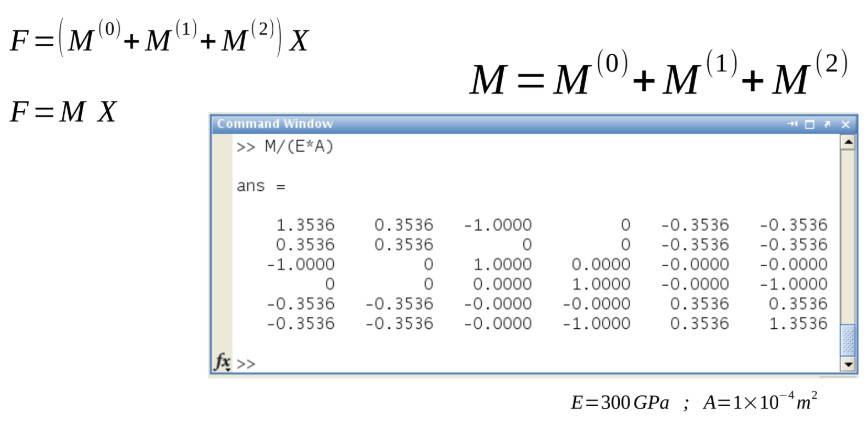

In [8]:
def ResolverSistemaMixto (A,b):
    #   Se define el vecctor de las fuerzas y los desplzamientos 

    n, m = np.shape(b)

    F = np.zeros([n,1])
    U = np.zeros([n,1])

    aux = b[:, 0] == 0  # Donde se conoce el valor de la fuerza
    aux2 = b[:, 0] == 1  # Donde se conoce el valor del desplazamiento

    I = np.arange(n) # Se define un vector de indices


    f_indices = I[aux]   # Índices conocidos de fuerza
    u_indices = I[aux2]  # Índices conocidos de dezplazamiento

    #   Esto asigna los valores que ya conozco a los vectores de Fuerza y Desplazamiento que quiero de mi problema

    F[aux] = b[aux,1].reshape(-1, 1) 
    U[aux2] = b[aux2,1].reshape(-1, 1)

    #   Construyo la matriz reducida

    A_red_f = A[np.ix_(f_indices,f_indices)]
    #A_red_u = A[np.ix_(u_indices,u_indices)]

    f_aux = F[f_indices]
    #u_aux = U[u_indices]

    #   Resuelvo el sistema de ecuaciones reducido

    u_sol = np.linalg.inv(A_red_f) @ (f_aux - A[np.ix_(f_indices,u_indices)] @ U[u_indices])

    #   Asigno los valores calculados a mi vector de Desplazamientos con CC

    U[f_indices] = u_sol

    F = np.dot(A,U)     # Se multiplican las matries para encontrar el vector de Fuerzas ... 

    return U, F


In [9]:
U0,F0 = ResolverSistemaMixto (ejemplo,b)
U1,F1 = ResolverSistemaMixto (matrizA,b)

np.set_printoptions(suppress=True, precision=10)        # Para eliminar los exponenciales

print('Estos son los resultados con los datos originales del problema')

print(np.round(U0,10))
print(np.round(F0,10))

print('Estos son los resultados con los datos de ejemplo del apunte TEORIA 5')

print(np.round(U1,10))
print(np.round(F1,10))

Estos son los resultados con los datos originales del problema
[[ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0.4]
 [-0.2]]
[[-2.]
 [-2.]
 [ 0.]
 [ 1.]
 [ 2.]
 [ 1.]]
Estos son los resultados con los datos de ejemplo del apunte TEORIA 5
[[ 0.          ]
 [ 0.          ]
 [-0.          ]
 [ 0.          ]
 [ 0.0000002219]
 [-0.0000000333]]
[[-2.]
 [-2.]
 [ 0.]
 [ 1.]
 [ 2.]
 [ 1.]]


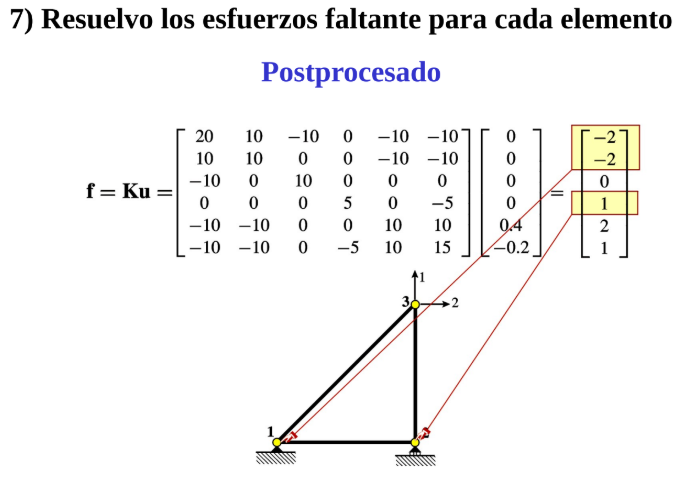